# Homework 11

Section 9.4

Math 404

Winter 2020

Logan Schelly

In [1]:
import numpy as np
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

## Exercise 9.19
Use scikit-learn to plot a ROC curve and compute AUC for three of your favorite (probabilistic) classifers,applied to three of your favorite datasets (not the Iris dataset).

In [2]:
def getROC(clf, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    clf.fit(X_train, y_train)
    
    X = X_test
    y = y_test
    
    tau_axis = 1
    observation_axis=0
    p_hat = clf.predict_proba(X)[:,1].reshape((-1,1))
    ps = np.unique(p_hat)
    p_changes = ps[1:] - ps[:-1]
    tau_shift = min(p_changes)/2
    taus_larger = ps + tau_shift
    tau = np.hstack((-1, taus_larger, 2)).reshape(1, -1)
    y_hat = p_hat > tau
    
    N_positive = y.sum()
    N_negative = y.size - N_positive
    
    FPs = (y_hat[y==0,:] == 1)
    FPR = FPs.sum(axis=observation_axis) / N_negative
    
    TPs = (y_hat[y==1,:] == 1)
    TPR = TPs.sum(axis=observation_axis) / N_positive
    
    return tau.ravel(), FPR, TPR

def getAUC(FPR, TPR):
    #Assuming FPR is ordered from largest to smallest.
    width_changes = FPR[:-1] - FPR[1:]
    average_endpoint_heights = (TPR[:-1] + TPR[1:])/2 #Trapezoid rule
    #Note: if FPR[i] == FPR[i+1], then no width, so no area. (good)
    return sum(width_changes*average_endpoint_heights)

def all3clf(X, y, dataset_name):
    fig = plt.figure(figsize=(8, 8))
    classifiers = [LogisticRegression(max_iter=10000), GaussianNB(), QuadraticDiscriminantAnalysis()]
    names = ["Logistic Regression", "Gaussian Naive Bayes", "QDA"]
    for clf, name in zip(classifiers, names):
        taus, FPR, TPR = getROC(clf, X, y)
        plt.plot(FPR, TPR, label=name)
        AUC = getAUC(FPR, TPR)
        print("{0:.5f} is the AUC for {1}".format(AUC, name))

    plt.title(dataset_name)
    plt.legend(loc='lower right')
    plt.xlim([-.01,1])
    plt.ylim([0,1.01])
    plt.show()

0.99655 is the AUC for Logistic Regression
0.98605 is the AUC for Gaussian Naive Bayes
0.99048 is the AUC for QDA


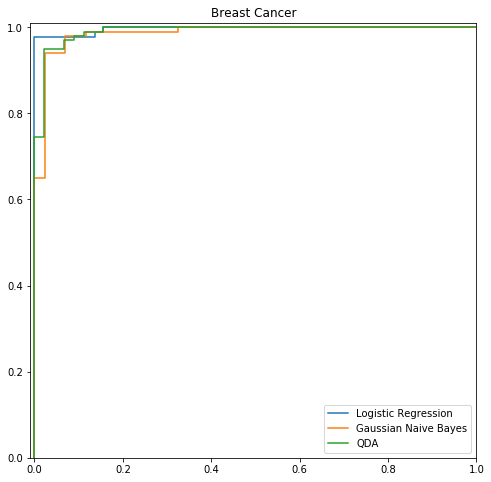

In [3]:
X, y = load_breast_cancer(return_X_y=True)
all3clf(X, y, "Breast Cancer")

1.00000 is the AUC for Logistic Regression
1.00000 is the AUC for Gaussian Naive Bayes
0.99370 is the AUC for QDA


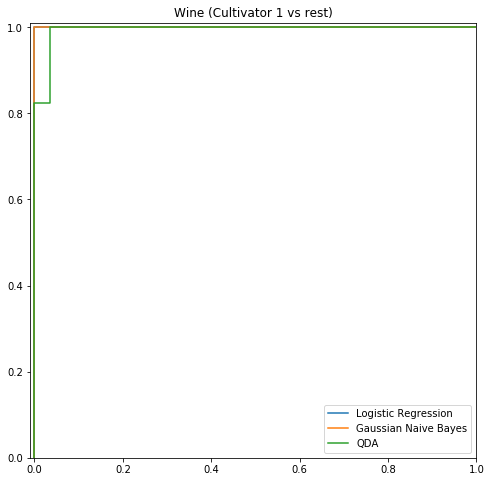

In [4]:
X, y = load_wine(return_X_y=True)
all3clf(X, y==1, "Wine (Cultivator 1 vs rest)")

0.99928 is the AUC for Logistic Regression
0.98044 is the AUC for Gaussian Naive Bayes
0.98926 is the AUC for QDA


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


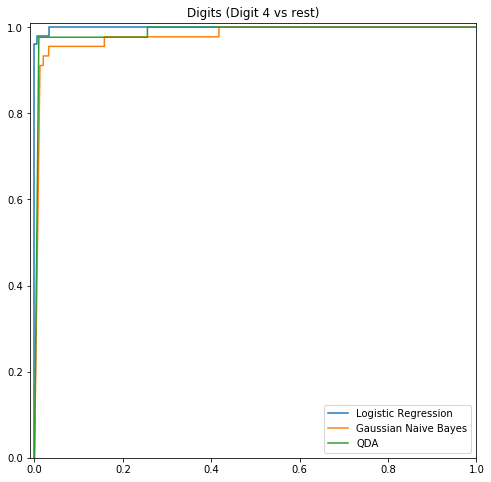

In [5]:
X, y = load_digits(return_X_y=True)
#Reduce dimension blindly -- variables are colinear.
all3clf(X, y==4, "Digits (Digit 4 vs rest)")